<a href="https://www.kaggle.com/code/vyom9670k/0-time-series-basic-projectb?scriptVersionId=106907207" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (24.0, 8.0)     # set figure size
plt.rcParams['image.interpolation'] = 'nearest' # set interpolation
plt.rcParams['font.sans-serif'] = 'SimHei'      # set font
plt.rcParams['font.size'] = 18 
plt.rcParams['axes.unicode_minus'] = False
# plt.rcParams['lines.linestyle'] = ':'
plt.rcParams['lines.linewidth'] = 3

import statsmodels.api as sm              # import with this way 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-total-female-births-in-california-1959/daily-total-female-births-CA.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def quntile(data) :   # Input type is DataFrame df[['column1','column2']]  must be numeric
    Q1 = data.quantile(0.25)#0.25
    Q3 = data.quantile(0.75)# 0.75
    IQR = Q3 - Q1
    return (data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)] )

In [4]:
df = pd.read_csv("../input/daily-total-female-births-in-california-1959/daily-total-female-births-CA.csv",parse_dates=['date'] ,index_col = 'date')#,squeeze=True)
print(df.isnull().sum())
print(df.shape)
df.head(5)

births    0
dtype: int64
(365, 1)


,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [5]:
df.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


symmetricity of data frame Data Frame births    0.447389
dtype: float64


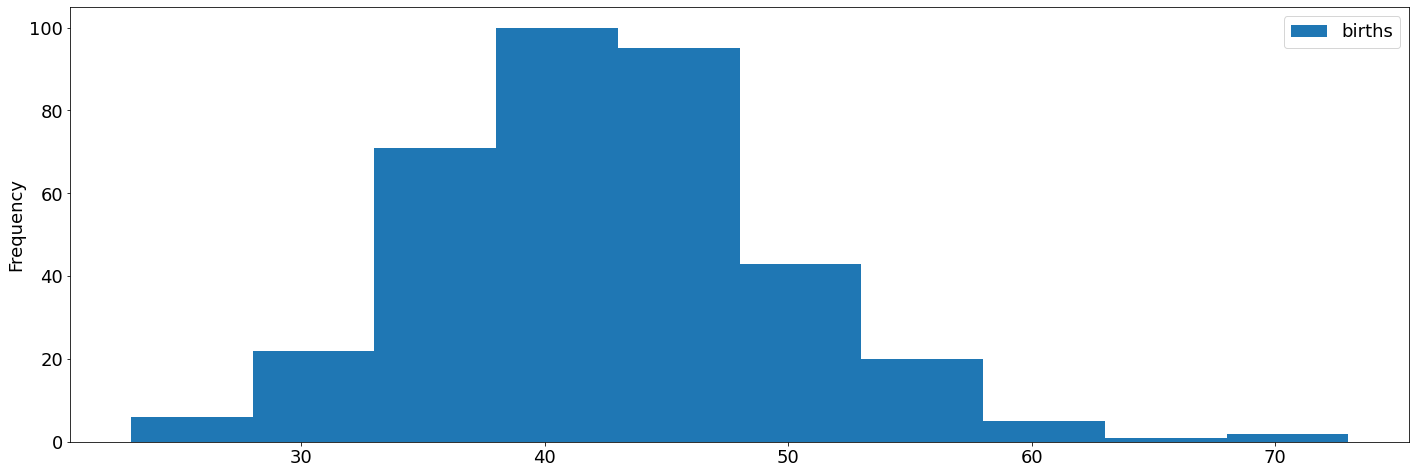

In [6]:
df.plot(kind = 'hist')
print( "symmetricity of data frame Data Frame" , df.skew() )

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
births,365.0,41.980822,7.348257,23.0,37.0,42.0,46.0,73.0


<AxesSubplot:xlabel='date'>

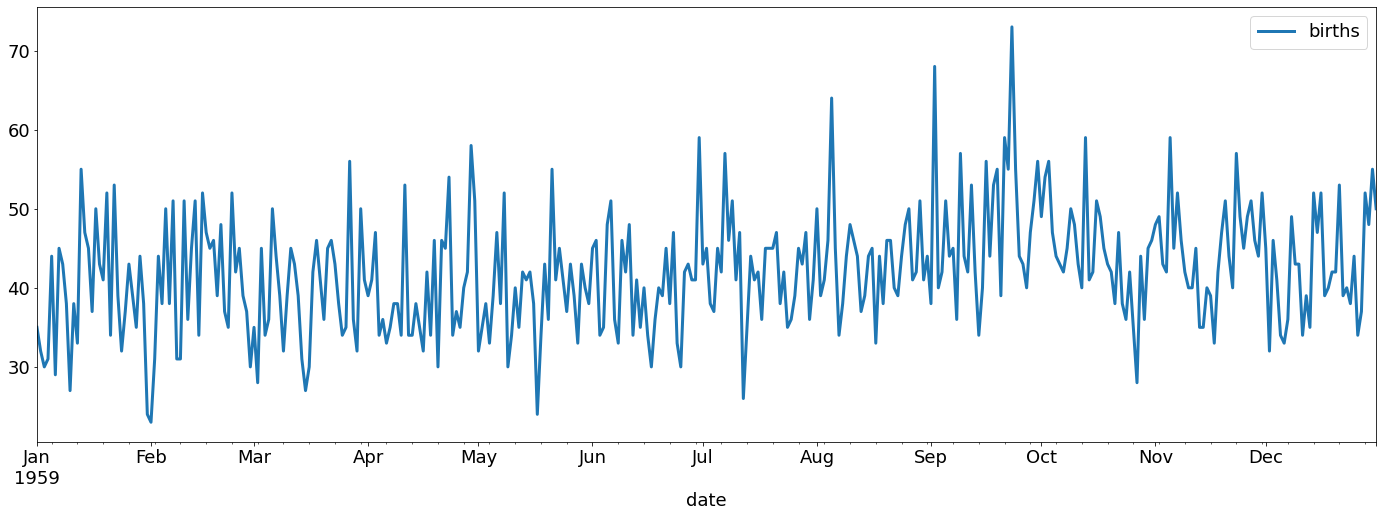

In [8]:
df.plot()

### Check the sattionary about data using ralling average

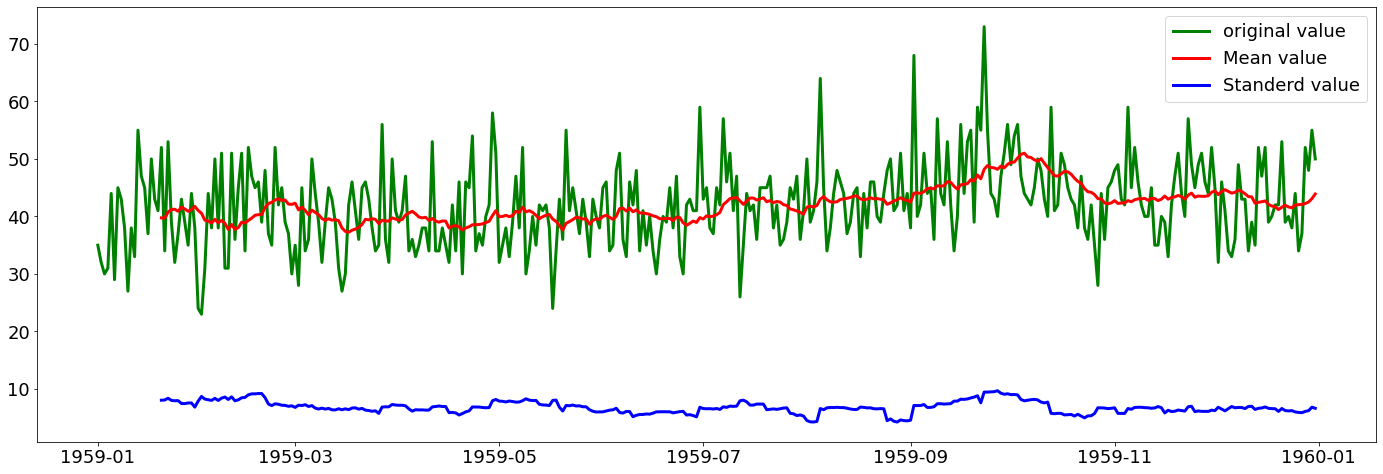

In [9]:
df_mean = df.rolling(window =20 ).mean()
df_std = df.rolling(window =20 ).std()
plt.plot(df,c = 'g')
plt.plot(df_mean,c = 'r')
plt.plot(df_std,c = 'b')
plt.legend( ["original value","Mean value","Standerd value"])


### Recent history will be best reflection of future

In [10]:
df_roll = pd.concat([df["births"],df["births"].shift(1)],axis = 1,keys=["Original_births",'births_Rolling'] )  # Rolling model with shift model
df_roll.head()

,Original_births,births_Rolling
date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


### To replace the nan value

In [11]:
df_roll = df_roll.fillna(0)
df_roll.head()

,Original_births,births_Rolling
date,,
1959-01-01,35,0.0
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
mean_squared_error(df_roll["Original_births"] ,df_roll["births_Rolling"] )

87.34794520547945

In [14]:
 df_roll[df_roll["Original_births"]<100].shape

(365, 2)

### Arima Model -  Autoregression (p) Integrated (d) moving average(q)

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### 1. Identification of d value  - form sattionary plat it will zero

### 2. Identification of q value by  plot_acf
1. how to decide value of q -  First value out of critical limit[blue border] from left side incounted as =1 and the so one, simlilerty ofr the p value 

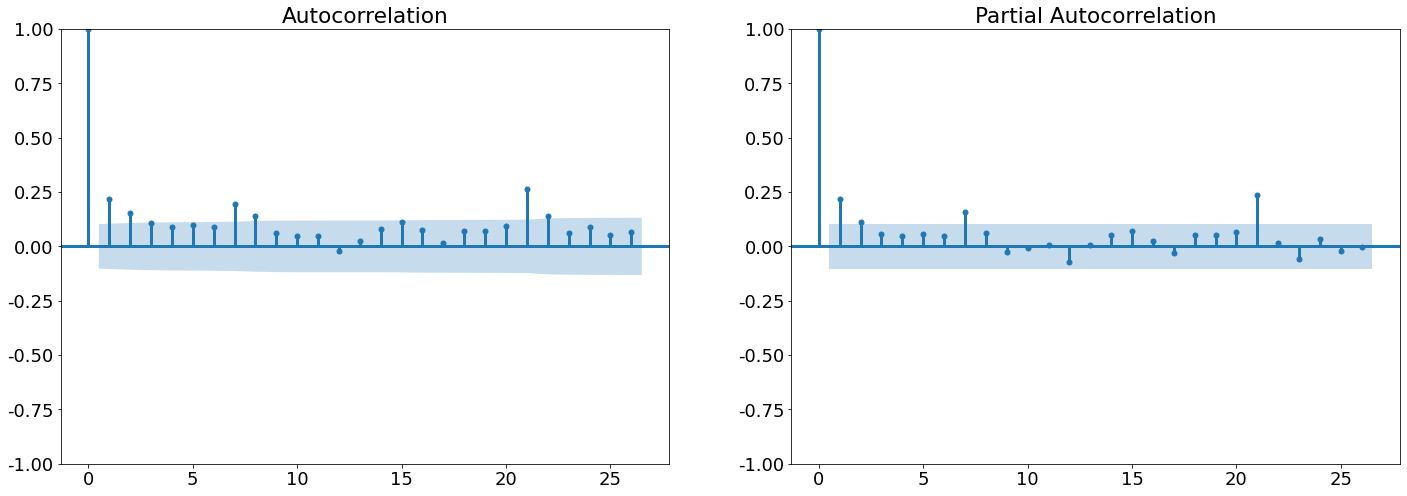

In [16]:
fig,ax = plt.subplots(1,2)
plot_acf(df,ax= ax[0]) ;
plot_pacf(df,ax = ax[1]) ;
###  2. Identification of q value by  plot_acf
### 3. Identification of p value by  plot_acf

In [17]:
## Arima model
def Arima_model_prediction(test_percentage):
#     test_percentage = 0.2
    # test_size = 
    test_start = int(len(df)*(1-test_percentage)) 
    
    df_test = df[test_start : ]    # for testing dataset
    df_train = df[0 : test_start]  # for trainng dataset
    
    # ARIMA
    model = sm.tsa.arima.ARIMA(df_train, order=(2,1,2))
    result = model.fit()
    
    print(result.aic)
    
    # predicted = result.forecast(steps = 73)              # Forecast future value
    predicted = result.forecast(steps = len(df) - test_start )              # Forecast future value
    
    print(predicted)
    
    print(np.sqrt(mean_squared_error(predicted,df_test)))
    
    plt.plot(df_test,c ='r')
    plt.plot(predicted,c = 'g')
    plt.legend(["TEST DATA","PREDICTED FUTURE FORCASRT"])
    plt.show()

256.2280052916398
1959-02-06    40.283437
1959-02-07    41.439901
1959-02-08    38.570558
1959-02-09    39.661413
1959-02-10    38.608527
                ...    
1959-12-27    38.903878
1959-12-28    38.903878
1959-12-29    38.903878
1959-12-30    38.903878
1959-12-31    38.903878
Freq: D, Name: predicted_mean, Length: 329, dtype: float64
7.953433416975279


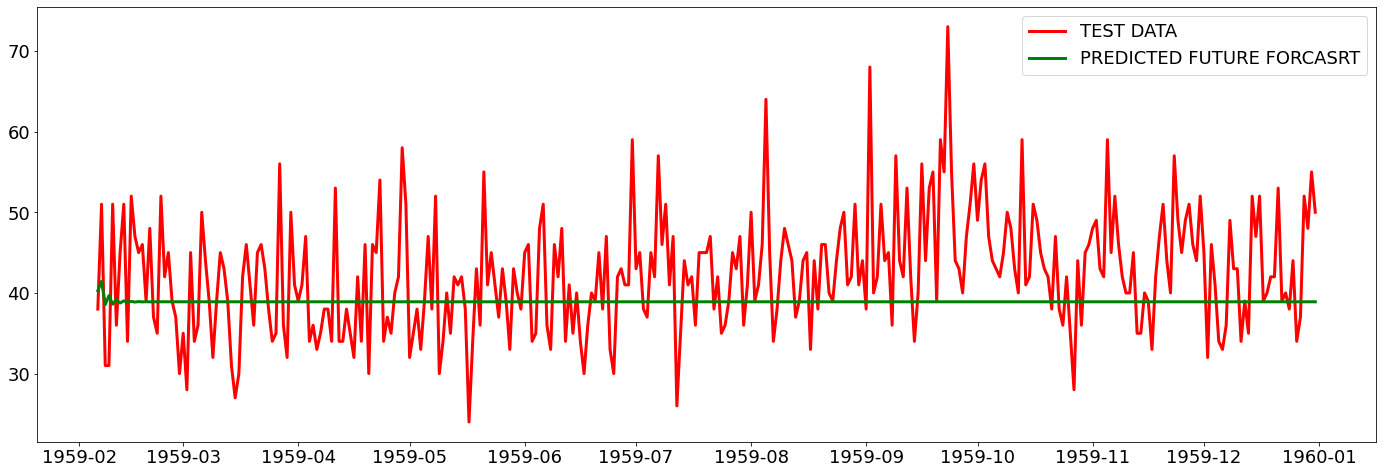

In [18]:
Arima_model_prediction(0.90)